# Learning Linear Models

##### Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

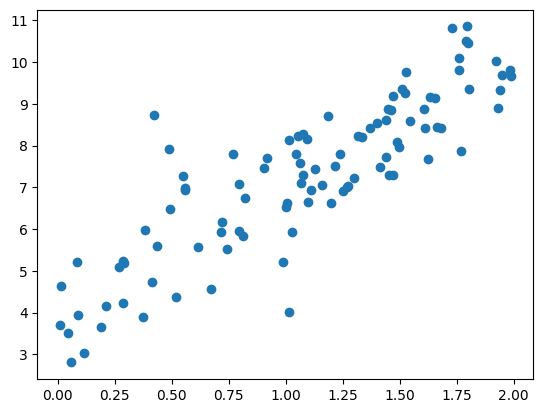

In [2]:
plt.scatter(X,y)

In [3]:
X_b = np.c_[np.ones((100,1)), X]

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.05627837],
       [10.00535188]])

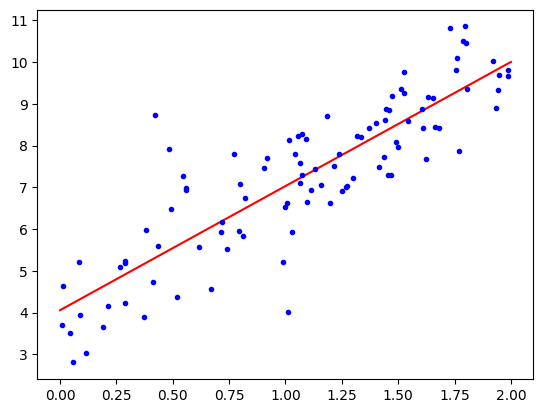

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_

array([4.05627837])

In [8]:
lin_reg.coef_

array([[2.97453675]])

In [9]:
lin_reg.predict(X_new)

array([[ 4.05627837],
       [10.00535188]])

In [10]:
theta_best

array([[4.05627837],
       [2.97453675]])

In [11]:
eta = 0.1
n_iterations = 1000
m = 100

In [12]:
theta = np.random.randn(2,1)

In [13]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [14]:
theta

array([[4.05627837],
       [2.97453675]])

In [15]:
theta_best

array([[4.05627837],
       [2.97453675]])

##### Stochastic Gradient Descent

In [16]:
n_epochs = 50
t0, t1  = 5, 50

def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)

In [17]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [18]:
theta

array([[4.05008111],
       [2.90369617]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [20]:
sgd_reg.intercept_

array([4.00507967])

In [21]:
sgd_reg.coef_

array([3.01089575])

##### Polinomial Regression

In [22]:
np.random.seed(42)

In [23]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1) #Gaussian noise

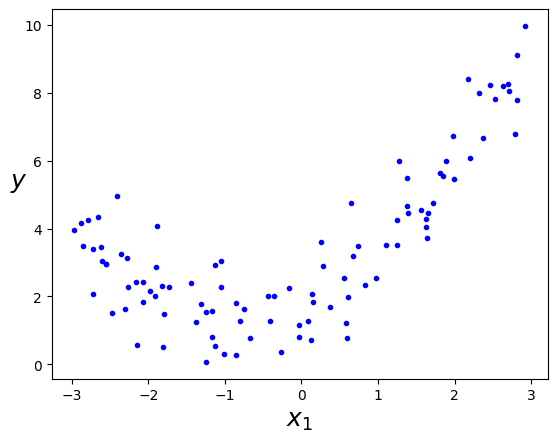

In [24]:
plt.plot(X,y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [27]:
X[0]

array([-0.75275929])

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_

array([1.78134581])

In [30]:
lin_reg.coef_

array([[0.93366893, 0.56456263]])

In [31]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

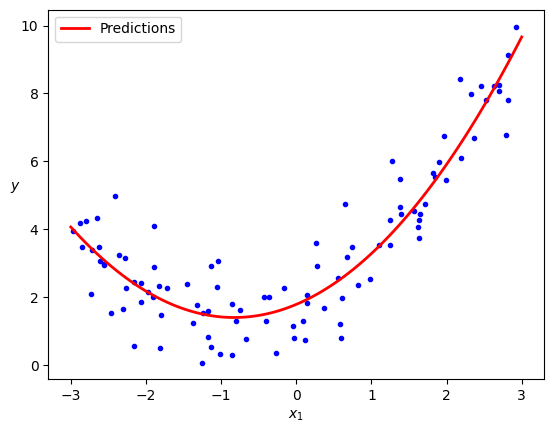

In [32]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', label='Predictions', linewidth=2)
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.legend(loc='upper left')
plt.show()

##### Learning Curves

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [34]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=10)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)+1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', label='train')
    plt.plot(np.sqrt(val_errors), 'b-', label='val')
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

(0.0, 80.0, 0.0, 3.0)

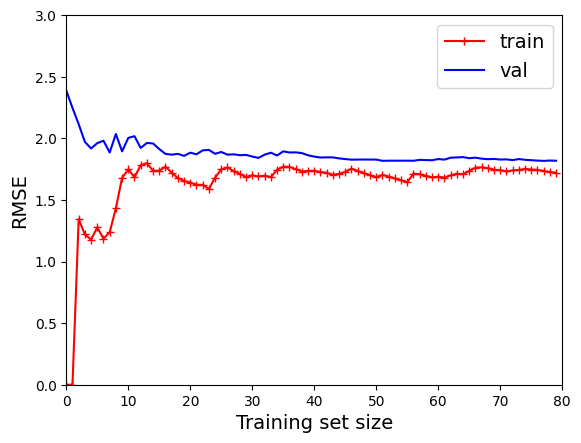

In [35]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0,80,0,3])

Here, we observe that the model's RMSE increases on the training data while decreasing on the validation data. Initially, the model learns from only a few examples, which causes it to overfit to the training data. However, when tested on the validation set, the small training set size leads to poor generalization, resulting in a high validation error. As the number of training examples increases, the model learns better, reducing the error on the validation set. At the same time, fitting the model to the training data becomes more challenging, as the model must generalize across a larger and more diverse dataset. At the end the error both on the validation and training sets are being close to each other

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data

In [36]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

(0.0, 80.0, 0.0, 3.0)

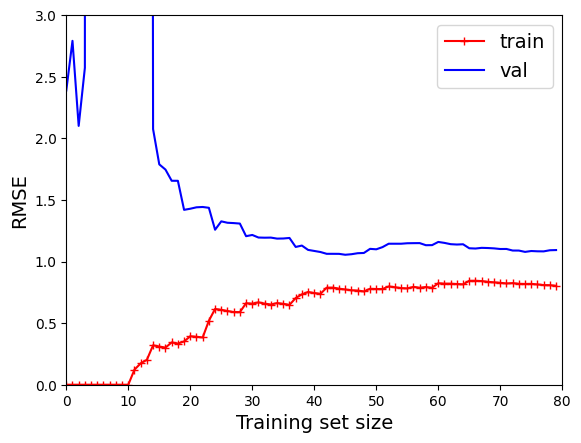

In [37]:
plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])

Learning curves indicate whether the model is overfitting or underfitting.

### Regularized Linear Models

Now we will look at the regularizaion techniques that reduces overfitting

##### Ridge Regression

In [38]:
from sklearn.linear_model import Ridge

In [39]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [40]:
ridge_reg.predict([[1.5]])

array([4.82497007])

In [41]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.78485105])

Ridge Regression can be used when we have very much features and fewer observations. Because in the cases like this overfitting comes to play

##### Lasso Regression

In [42]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.2971566])

Elastic Net

In [43]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.40591515])

##### Logistic Regression

In [50]:
from sklearn import datasets

In [51]:
iris  = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [58]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype('int64')

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [63]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

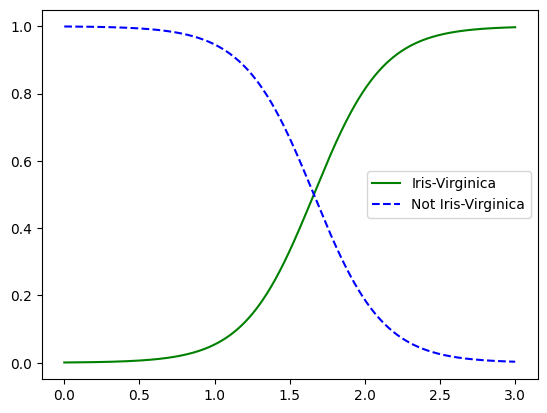

In [65]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.legend()


In [67]:
log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int64)